In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [5]:
types = pd.read_csv('asu.tsv', sep=';', comment='#',skip_blank_lines = False,header = 1)
types = types.drop([0,1])
types = types.reset_index()
types = types.drop('index',axis = 1)

l = []
for i in range(len(types['_1'])):
    if type(types['_1'][i]) != str:
        l.append(i)
        
types = types.drop(l)
types = types.reset_index()
cropped = types.drop('index',axis = 1)
cropped

/var/folders/q0/j2_r46dn4g923tw2ygktb44w0000gn/T/ipykernel_1378/1314442412.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  types = pd.read_csv('asu.tsv', sep=';', comment='#',skip_blank_lines = False,header = 1)


_1  \
0       312.908065 -41.341475                      
1                           311.509773 -38.03733   
2                          316.664941 -45.311435   
3                          321.557516 -43.650433   
4                           318.57321 -39.753376   
...                                          ...   
857989                      40.806788 -62.554542   
857990                      48.994722 -70.857645   
857991                      29.295227 -65.853188   
857992                       46.080168 -62.32618   
857993                      51.613651 -72.740089   

                                  Type    RAJ2000    DEJ2000  
0       MISC                            312.90804  -41.34142  
1                                  NaN        NaN        NaN  
2                                  NaN        NaN        NaN  
3                                  NaN        NaN        NaN  
4                                  NaN        NaN        NaN  
...                                ...        ...        ...  
857989                             NaN        NaN        NaN  
857990                             NaN        NaN        NaN  
857991                             NaN        NaN        NaN  
857992                             NaN        NaN        NaN  
857993                             NaN        NaN        NaN  

[857994 rows x 4 columns]

In [6]:
cam1 = pd.read_csv('Sector 01 (1).csv', sep=',', comment='#', dtype = str)
cam2 = pd.read_csv('Sector 01 (2).csv', sep=',', comment='#', dtype = str)
cam3 = pd.read_csv('Sector 01 (3).csv', sep=',', comment='#', dtype = str)
cams = pd.concat([cam1,cam2,cam3])
cams = cams.reset_index()
alldata = cams.drop('index',axis = 1)
alldata

ra         dec              Vmag              Kmag  \
0       312.908065  -41.341475  10.1590003967285  3.85199999809265   
1       311.509773   -38.03733   9.3120002746582  4.27500009536743   
2       316.664941  -45.311435  7.92799997329712  5.51000022888184   
3       321.557516  -43.650433  9.30099964141846  4.33199977874756   
4        318.57321  -39.753376  8.51000022888184  4.88100004196167   
...            ...         ...               ...               ...   
857989   40.806788  -62.554542               NaN  14.3319997787476   
857990   48.994722  -70.857645  17.3129997253418  15.8000001907349   
857991   29.295227  -65.853188  17.4309997558594  15.0430002212524   
857992   46.080168   -62.32618   17.742000579834  14.8249998092651   
857993   51.613651  -72.740089  17.5470008850098  15.0109996795654   

                   w1mag             w4mag    Teff     Jstet  RMS_60m  \
0       3.73200011253357  3.02600002288818  2932.0  43.97405  0.02801   
1       4.19899988174438  4.02699995040894  3343.0   8.72058  0.00757   
2        5.4850001335144  5.38000011444092  4660.0    0.1555  0.00043   
3       4.23799991607666  4.07600021362305  3180.0  16.56325  0.01331   
4       4.83900022506714  4.71799993515015  3952.0    3.4978  0.00296   
...                  ...               ...     ...       ...      ...   
857989   14.201000213623  9.37399959564209  3906.0   0.12196  0.01086   
857990  15.6049995422363  9.47999954223633     NaN  -0.28832  0.00119   
857991  15.4759998321533  9.25500011444092  4753.0  -0.24486  0.00222   
857992  14.5839996337891  9.42399978637695  4332.0  -0.20275  0.00649   
857993  14.9020004272461  9.41699981689453  4625.0  -0.31181  0.00125   

          LS_Period      LS_SNR   BLS_Period   BLS_SDE Unnamed: 13  
0         13.916504  1257.72272   0.10409945   8.77144         NaN  
1       18.55533867  6787.43283   0.10415349   8.16427         NaN  
2          8.697815    56.49776   9.82695053    7.5447         NaN  
3       12.65136727  59653.2397   0.10409945   8.02792         NaN  
4        5.45745255  3953.34708  10.89407437  10.41665         NaN  
...             ...         ...          ...       ...         ...  
857989  14.64927263   675.28947    13.916809   8.06362         NaN  
857990  15.46312111    64.49011    13.916809   9.67914         NaN  
857991   7.32463632    30.26699    13.916809  11.62516         NaN  
857992  14.64927263   128.57675  13.01413546   9.65545         NaN  
857993  17.39601125    37.05058    13.916809   6.10542         NaN  

[857994 rows x 14 columns]

In [24]:
stars = pd.concat([cropped, alldata], axis=1)

m = []
for i in range(len(stars['Type'])):
    if type(stars['Type'][i]) != str:
        m.append(i)
        
stars = stars.drop(m)
stars = stars.drop('Unnamed: 13', axis=1)
stars = stars.dropna(axis=0)
stars = stars.reset_index()
stars = stars.drop('index',axis = 1)
stars

_1  \
0      312.908065 -41.341475                      
1      325.888097 -43.14454                       
2      316.58919 -37.587605                       
3      316.495762 -36.25944                       
4      320.519456 -42.76817                       
...                                         ...   
20172  40.218723 -71.55455                        
20173  50.085421 -63.716766                       
20174  38.415599 -70.746452                       
20175  47.326487 -64.232262                       
20176  56.6001 -70.972236                         

                                 Type    RAJ2000    DEJ2000          ra  \
0      MISC                            312.90804  -41.34142  312.908065   
1      MISC                            325.88804  -43.14456  325.888097   
2      DSCT                            316.58900  -37.58761   316.58919   
3      EW                              316.49575  -36.25944  316.495762   
4      SRB                             320.51950  -42.76814  320.519456   
...                               ...        ...        ...         ...   
20172  VAR                              40.17769  -71.55979   40.218723   
20173  EA                               50.10655  -63.71658   50.085421   
20174  SRS                               38.4805  -70.76797   38.415599   
20175  RRC                              47.31803  -64.24475   47.326487   
20176  DSCT                              56.5698  -70.98815     56.6001   

              dec              Vmag              Kmag             w1mag  \
0      -41.341475  10.1590003967285  3.85199999809265  3.73200011253357   
1       -43.14454  10.1979999542236   4.3270001411438  4.21199989318848   
2      -37.587605  7.67000007629395  6.79899978637695  6.68900012969971   
3       -36.25944  7.81099987030029  6.57299995422363  6.49300003051758   
4       -42.76817  10.4829998016357  4.31699991226196  4.28599977493286   
...           ...               ...               ...               ...   
20172   -71.55455  17.0100002288818  15.2410001754761  15.1459999084473   
20173  -63.716766  17.1189994812012  15.1639995574951  15.1899995803833   
20174  -70.746452  17.3059997558594  15.0249996185303  14.9259996414185   
20175  -64.232262  17.3169994354248  15.0790004730225  15.2650003433228   
20176  -70.972236  18.0520000457764  14.4079999923706  14.2869997024536   

                  w4mag    Teff      Jstet  RMS_60m    LS_Period       LS_SNR  \
0      3.02600002288818  2932.0   43.97405  0.02801    13.916504   1257.72272   
1      3.90599989891052  3070.0   30.66852   0.0231  11.59708667    2427.2134   
2      6.76300001144409  6955.0    5.44499  0.00342   0.19195178   1053.53284   
3      6.38700008392334  6229.0  159.30206  0.08317   0.20540965  13818.54387   
4      3.56200003623962  2907.0   63.64927  0.04856  14.64895158   3442.16087   
...                 ...     ...        ...      ...          ...          ...   
20172  9.42899990081787  5394.0    0.10081  0.00179  15.46312111    173.39735   
20173  9.41699981689453  5181.0    2.77277  0.06068   0.20038602   2397.29459   
20174  9.13399982452393  4851.0    7.01209  0.01693   7.13682513    686.66599   
20175   9.1540002822876  4891.0    0.34217  0.00719    0.3731048   2500.89979   
20176  9.26200008392334  3851.0   -0.18732  0.00618  14.64927263    128.19016   

       BLS_Period   BLS_SDE  
0      0.10409945   8.77144  
1      0.10409945    7.5651  
2      0.19192628   7.78431  
3       0.2052788   9.75553  
4      0.10420759   8.50958  
...           ...       ...  
20172   0.1042076     8.773  
20173  0.20035915  11.69317  
20174   13.916809  10.53619  
20175  0.37334696   9.18888  
20176   0.1477036    8.5712  

[20177 rows x 17 columns]

In [25]:
VmKmag = []
for i in range(len(stars['Kmag'])):
    VmKmag.append(float(stars['Vmag'][i]) - float(stars['Kmag'][i]))
    
VmKmag

[6.30700039863585,
 5.870999813079801,
 0.8710002899170002,
 1.2379999160766602,
 6.165999889373739,
 5.07600021362305,
 5.49099969863895,
 3.6949996948242205,
 3.19099998474121,
 0.69700050354004,
 3.05399990081787,
 6.61599969863888,
 5.158999919891411,
 4.021000385284429,
 5.760999679565411,
 5.95199966430659,
 4.815000057220479,
 1.0299997329711905,
 0.5130004882812491,
 5.145000457763651,
 5.53700017929074,
 2.645999431610111,
 3.99999952316288,
 6.14899969100948,
 8.101000308990479,
 4.920000076293901,
 6.58800029754637,
 2.702000141143799,
 5.371999740600569,
 4.09099960327153,
 5.96399974823001,
 5.21599960327145,
 1.9910001754760698,
 2.1209998130798304,
 2.55900049209595,
 2.6219997406005806,
 3.873000144958451,
 5.47800016403198,
 3.0089998245239196,
 0.9070005416870099,
 0.76300048828125,
 7.8710002899169895,
 2.26999998092651,
 2.9169998168944895,
 2.21099948883057,
 5.71699953079228,
 2.4459996223449707,
 5.226999759674119,
 2.8460001945495303,
 3.7379994392394797,
 4.484

In [26]:
w1mw4mag = []
for i in range(len(stars['w1mag'])):
    w1mw4mag.append(float(stars['w1mag'][i]) - float(stars['w4mag'][i]))

w1mw4mag

[0.7060000896453897,
 0.3059999942779603,
 -0.07399988174438032,
 0.10599994659424006,
 0.7239997386932404,
 0.1789999008178702,
 0.38399982452392045,
 0.22000026702880948,
 0.09800004959106978,
 -0.2869997024536204,
 0.1489996910095206,
 0.42999982833863015,
 0.2330002784728995,
 0.28599977493285955,
 0.375,
 0.19199991226196023,
 0.25,
 0.06199979782104048,
 -0.018000125885009766,
 0.1789999008178702,
 1.24200010299682,
 0.14799976348877042,
 0.3120002746581996,
 0.3489999771118102,
 1.7979998588562003,
 0.3449997901916504,
 1.0199999809265101,
 0.041000366210939276,
 0.3039999008178702,
 0.24399995803833008,
 0.3280000686645499,
 0.3039999008178702,
 0.014999866485600144,
 -0.027999877929680395,
 -0.021999835968020243,
 0.06200027465819957,
 0.05200004577636008,
 1.1209998130798304,
 0.11700010299681995,
 -0.20800018310546875,
 0.022000312805168676,
 1.8070001602172896,
 0.002000331878659445,
 0.10599994659424006,
 -0.06500005722045987,
 0.46500015258788974,
 0.0780000686645499,
 0.

In [27]:
dict = {'VmKmag': VmKmag, 'w1mw4mag': w1mw4mag} 
   
calcs = pd.DataFrame(dict)
   
calcs 

VmKmag  w1mw4mag
0      6.307000     0.706
1      5.871000     0.306
2      0.871000    -0.074
3      1.238000     0.106
4      6.166000     0.724
...         ...       ...
20172  1.769000     5.717
20173  1.955000     5.773
20174  2.281000     5.792
20175  2.237999     6.111
20176  3.644000     5.025

[20177 rows x 2 columns]

In [28]:
stars = pd.concat([stars, calcs], axis=1)
stars = stars.drop(['w1mag','w4mag','Vmag','Kmag','RAJ2000','DEJ2000','ra','dec'], axis=1)
stars

_1  \
0      312.908065 -41.341475                      
1      325.888097 -43.14454                       
2      316.58919 -37.587605                       
3      316.495762 -36.25944                       
4      320.519456 -42.76817                       
...                                         ...   
20172  40.218723 -71.55455                        
20173  50.085421 -63.716766                       
20174  38.415599 -70.746452                       
20175  47.326487 -64.232262                       
20176  56.6001 -70.972236                         

                                 Type    Teff      Jstet  RMS_60m  \
0      MISC                            2932.0   43.97405  0.02801   
1      MISC                            3070.0   30.66852   0.0231   
2      DSCT                            6955.0    5.44499  0.00342   
3      EW                              6229.0  159.30206  0.08317   
4      SRB                             2907.0   63.64927  0.04856   
...                               ...     ...        ...      ...   
20172  VAR                             5394.0    0.10081  0.00179   
20173  EA                              5181.0    2.77277  0.06068   
20174  SRS                             4851.0    7.01209  0.01693   
20175  RRC                             4891.0    0.34217  0.00719   
20176  DSCT                            3851.0   -0.18732  0.00618   

         LS_Period       LS_SNR  BLS_Period   BLS_SDE    VmKmag  w1mw4mag  
0        13.916504   1257.72272  0.10409945   8.77144  6.307000     0.706  
1      11.59708667    2427.2134  0.10409945    7.5651  5.871000     0.306  
2       0.19195178   1053.53284  0.19192628   7.78431  0.871000    -0.074  
3       0.20540965  13818.54387   0.2052788   9.75553  1.238000     0.106  
4      14.64895158   3442.16087  0.10420759   8.50958  6.166000     0.724  
...            ...          ...         ...       ...       ...       ...  
20172  15.46312111    173.39735   0.1042076     8.773  1.769000     5.717  
20173   0.20038602   2397.29459  0.20035915  11.69317  1.955000     5.773  
20174   7.13682513    686.66599   13.916809  10.53619  2.281000     5.792  
20175    0.3731048   2500.89979  0.37334696   9.18888  2.237999     6.111  
20176  14.64927263    128.19016   0.1477036    8.5712  3.644000     5.025  

[20177 rows x 11 columns]

In [511]:
h = []
for i in range(len(stars['Type'])):
    if 'RR' not in stars['Type'][i]:
        h.append(i)
RR = stars.drop(h)

for val in RR.Type.unique():
    RR.replace(to_replace=val, value=0, inplace=True)

RR

_1  Type    Teff     Jstet  \
17     313.037168 -44.117469                        0  6689.0  -0.24584   
32     316.707735 -39.548101                        0  4995.5   -0.2949   
33     313.037233 -38.375238                        0  5135.0    0.8386   
38     325.529948 -41.746186                        0  4206.0   0.26542   
44     322.482535 -42.717335                        0  4478.0  -0.14223   
...                                         ...   ...     ...       ...   
20130  26.936522 -69.44281                          0  5080.0   -0.0848   
20138  56.378136 -71.963027                         0  4701.0  -0.27963   
20151  41.106037 -66.037209                         0  4864.0  -0.28189   
20167  38.894043 -61.753326                         0  4932.0  -0.29478   
20175  47.326487 -64.232262                         0  4891.0   0.34217   

       RMS_60m    LS_Period      LS_SNR   BLS_Period  BLS_SDE    VmKmag  \
17     0.00017   2.35872949    97.95273   5.36226045  7.84118  1.030000   
32     0.00015  12.10130783    46.88342  13.01386874  10.6711  1.991000   
33     0.00204   11.1332032  3955.68909  10.33303424  7.46914  2.121000   
38      0.0012   3.81274082   135.76632   7.31803081  9.67678  3.009000   
44     0.00044   1.04635368    16.44768   6.00410837  6.54329  2.210999   
...        ...          ...         ...          ...      ...       ...   
20130  0.00313   0.59857243   557.03453   0.59997826  7.35359  2.049000   
20138  0.01242   0.51448462     8.77079  11.51974555  4.95512  2.373000   
20151  0.01594    13.916809    48.65747  10.33320239  6.94738  2.267000   
20167  0.00395  14.64927263    61.11351    13.916809  9.24742  2.196000   
20175  0.00719    0.3731048  2500.89979   0.37334696  9.18888  2.237999   

       w1mw4mag  
17     0.062000  
32     0.015000  
33    -0.028000  
38     0.117000  
44    -0.065000  
...         ...  
20130  5.389999  
20138  4.598001  
20151  5.141000  
20167  6.193999  
20175  6.111000  

[5526 rows x 11 columns]

In [341]:
h = []
for i in range(len(stars['Type'])):
    if 'DSCT' not in stars['Type'][i]:
        if 'HADS' not in stars['Type'][i]:
            h.append(i)
DSCT = stars.drop(h)

for val in DSCT.Type.unique():
    DSCT.replace(to_replace=val, value='DSCT', inplace=True)

DSCT

_1  Type    Teff     Jstet  \
2      316.58919 -37.587605                      DSCT  6955.0   5.44499   
8      316.602253 -37.595284                     DSCT  4171.0   5.12662   
40     323.011194 -37.769822                     DSCT  7296.0   0.61889   
65     322.711983 -38.513587                     DSCT  7085.0   0.18698   
66     315.146654 -42.655623                     DSCT  7436.0   6.70882   
...                                         ...   ...     ...       ...   
20050  46.831691 -65.05497                       DSCT  6500.0  -0.19645   
20060  28.803528 -62.22588                       DSCT  4196.0  -0.24816   
20082  52.856558 -66.155315                      DSCT  7256.0  -1.13834   
20134  31.581516 -62.953217                      DSCT  4732.0  -0.16478   
20176  56.6001 -70.972236                        DSCT  3851.0  -0.18732   

       RMS_60m    LS_Period      LS_SNR  BLS_Period  BLS_SDE    VmKmag  \
2      0.00342   0.19195178  1053.53284  0.19192628  7.78431  0.871000   
8      0.00343   0.19195178  1009.59981  0.19211005  7.20007  3.191000   
40     0.00177   0.40163071  1604.05042  0.40095134  8.75011  0.763000   
65     0.00106   0.11798647  1586.44772  0.10624934  7.12761  0.792001   
66     0.01539   0.13916504    40.18014  0.13435165  9.17275  0.688000   
...        ...          ...         ...         ...      ...       ...   
20050  0.01719   0.28518051   118.76635  0.16360102  9.66437  1.028000   
20060  0.00274  11.59734083   138.05916  0.17593833  9.41577  3.117999   
20082  0.01358    13.916809    13.86847  0.11855417  9.21225  0.665999   
20134  0.00226  14.64927263   208.02508  0.10409947  7.23428  2.411001   
20176  0.00618  14.64927263   128.19016   0.1477036   8.5712  3.644000   

       w1mw4mag  
2     -0.074000  
8      0.098000  
40     0.022000  
65     0.337000  
66     0.415000  
...         ...  
20050  5.643001  
20060  4.573000  
20082  5.310000  
20134  5.158000  
20176  5.025000  

[401 rows x 11 columns]

In [512]:
h = []
for i in range(len(stars['Type'])):
    if 'EC' not in stars['Type'][i]:
        if 'EW' not in stars['Type'][i]:
            h.append(i)
EC = stars.drop(h)

for val in EC.Type.unique():
    EC.replace(to_replace=val, value=1, inplace=True)

EC

_1  Type             Teff  \
3      316.495762 -36.25944                         1           6229.0   
29     315.98764 -42.852323                         1           3660.0   
34     322.869983 -38.556416                        1           4538.0   
43     311.249716 -38.66717                         1  4504.7998046875   
54     318.491003 -35.553266                        1           6883.0   
...                                         ...   ...              ...   
20154  49.597271 -62.351631                         1           4407.0   
20158  29.296014 -69.417198                         1           5030.0   
20160  54.180419 -64.217087                         1           4391.0   
20170  34.078377 -65.507809                         1           4141.0   
20171  34.959516 -61.656746                         1           4538.0   

           Jstet  RMS_60m   LS_Period       LS_SNR   BLS_Period   BLS_SDE  \
3      159.30206  0.08317  0.20540965  13818.54387    0.2052788   9.75553   
29        8.4157  0.01285  9.27766933   1374.70683   0.10420759   8.23016   
34       3.18539   0.0043  11.1332032   7921.06287  10.89407437  11.78836   
43      -0.02237  0.00067  0.20227477     82.11215    0.4041821   7.36452   
54      51.74774  0.08502  0.47741009   8903.95492   0.95354707   9.88294   
...          ...      ...         ...          ...          ...       ...   
20154   -0.18074  0.01121   8.4344297     53.40084   9.36826362  10.38692   
20158     2.8304  0.03175  0.17013214    7596.1992   0.34040927  10.32661   
20160    2.48343  0.00937  0.14633869  12091.30482   0.14630348  10.87976   
20170   -0.26812  0.00428   0.1354434     168.2384   0.27098653  10.25139   
20171    5.64352  0.01871  0.25442064    9714.5933    0.2541661   9.46276   

         VmKmag  w1mw4mag  
3      1.238000     0.106  
29     4.091000     0.244  
34     2.559000    -0.022  
43     2.917000     0.106  
54     0.986000     0.296  
...         ...       ...  
20154  2.814001     5.282  
20158  2.097000     5.680  
20160  2.745000     5.114  
20170  3.202999     4.971  
20171  2.642999     5.155  

[4017 rows x 11 columns]

In [343]:
h = []
for i in range(len(stars['Type'])):
    if 'ED' not in stars['Type'][i]:
        if 'EA' not in stars['Type'][i]:
            if 'ESD' not in stars['Type'][i]:
                if 'EB' not in stars['Type'][i]:
                    h.append(i)
ED = stars.drop(h)

for val in ED.Type.unique():
    ED.replace(to_replace=val, value='ED', inplace=True)

ED

_1 Type    Teff     Jstet  \
18     318.580514 -42.79865                       ED  7639.0   3.91685   
49     319.349907 -35.077507                      ED  3807.0   3.33931   
56     326.091341 -41.595419                      ED  2976.0  10.78949   
60     313.671598 -45.730729                      ED  6590.0  21.95104   
63     314.632219 -43.754751                      ED  6690.0   -0.1939   
...                                         ...  ...     ...       ...   
20147  29.786748 -63.337555                       ED  5905.0   0.82034   
20158  29.296014 -69.417198                       ED  5030.0    2.8304   
20159  41.907769 -67.080727                       ED  4985.0  -0.23305   
20166  49.084717 -61.694286                       ED  3471.0   2.06795   
20173  50.085421 -63.716766                       ED  5181.0   2.77277   

       RMS_60m    LS_Period      LS_SNR  BLS_Period   BLS_SDE    VmKmag  \
18     0.01136   1.35111689   278.11897  2.69617697  12.17294  0.513000   
49      0.0056   9.59758897   744.64868  0.10415349   8.52776  3.737999   
56     0.02181    13.916504  2770.24812  0.10420759   8.60352  6.158999   
60     0.06351   0.49349305  1745.40927   0.9863605  11.40109  1.108000   
63     0.00041  16.37235765   442.88597   13.916504  12.53238  1.038000   
...        ...          ...         ...         ...       ...       ...   
20147  0.02943    0.1965651  1918.98424  0.39309623  12.56194  1.387000   
20158  0.03175   0.17013214   7596.1992  0.34040927  10.32661  2.097000   
20159  0.01341  17.39601125    33.48176   13.916809   6.80815  2.142000   
20166  0.01557   0.27049191  6935.62772  0.54166776   9.52943  4.649000   
20173  0.06068   0.20038602  2397.29459  0.20035915  11.69317  1.955000   

       w1mw4mag  
18       -0.018  
49       -0.002  
56        0.492  
60       -0.041  
63       -0.445  
...         ...  
20147     5.944  
20158     5.680  
20159     5.498  
20166     4.533  
20173     5.773  

[2256 rows x 11 columns]

In [ ]:
h = []
for i in range(len(variables['Type'])):
    if 'DCEP' not in variables['Type'][i]:
        h.append(i)
DCEP = variables.drop(h)
DCEP

In [344]:
ECsam = EC.sample(n=269)
EDsam = ED.sample(n=269)
RRsam = RR.sample(n=269)
DSCTsam = DSCT.sample(n=269)

interest = pd.concat([ECsam,EDsam,RRsam,DSCTsam])
interest

_1  Type    Teff     Jstet  \
3168   330.977796 -39.032225                        0  5349.0  -0.24408   
731    318.201205 -44.475039                        0  4349.0   0.52304   
417    317.327081 -36.596447                        0  4563.0   0.06342   
14084  343.040427 -70.389725                        0  6510.0  27.42867   
19241  34.852534 -61.635384                         0  5810.0   4.53795   
...                                         ...   ...     ...       ...   
7834   325.194343 -69.374578                     DSCT  7202.0   0.31595   
2      316.58919 -37.587605                      DSCT  6955.0   5.44499   
12704  318.95615 -56.107175                      DSCT  7491.0  -1.17621   
12238  324.316737 -47.108986                     DSCT  4761.0  -0.28415   
1584   323.292531 -44.152912                     DSCT  7576.0  -0.03091   

       RMS_60m    LS_Period       LS_SNR   BLS_Period   BLS_SDE  VmKmag  \
3168   0.00968   0.13330277     25.05515   0.26666468   4.77483   1.807   
731    0.00677   0.15340394   4904.11997   0.15346394   9.02634   2.802   
417     0.0035  13.25381333    337.99907  13.01386874  10.05991   2.529   
14084  0.10457   0.26865838  11997.01457   0.26880812    9.9572   1.112   
19241  0.02485   0.25442064   7184.12003   0.25448848   9.50098   1.568   
...        ...          ...          ...          ...       ...     ...   
7834   0.00471   3.47912587     66.89992   7.06051348   9.07499   0.689   
2      0.00342   0.19195178   1053.53284   0.19192628   7.78431   0.871   
12704  0.01906  13.25381333     12.00459   0.12743958   9.31035   0.570   
12238  0.00382  14.64895158      62.6778   0.10409945   6.96321   2.309   
1584   0.00134  14.64895158    137.69795    13.916504   8.35539   0.537   

       w1mw4mag  
3168   5.328000  
731    2.060000  
417    1.299000  
14084  1.071000  
19241  1.888000  
...         ...  
7834   0.169000  
2     -0.074000  
12704  5.849999  
12238  3.566000  
1584   5.147000  

[1076 rows x 11 columns]

In [345]:
X = interest.drop(columns = ['_1','Type'])
X = X.apply(pd.to_numeric)
Y = interest['Type']
X_train, X_test, y_train, y_test = train_test_split(X.apply(pd.to_numeric),Y,test_size=0.25, train_size=0.75)
print(len(X_train), len(X_test), len(y_train), len(y_test))

807 269 807 269


In [346]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)
ypred

ValueError: Unknown label type: 'unknown'

In [ ]:
metrics.confusion_matrix(y_test, ypred)

In [38]:
metrics.accuracy_score(y_test, ypred)

0.31970260223048325

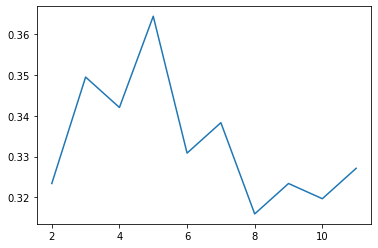

In [39]:
neighbors = [2,3,4,5,6,7,8,9,10,11]
accuracy = []
for val in neighbors:
    knn = KNeighborsClassifier(n_neighbors=val)
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
    
plt.plot(neighbors,accuracy)

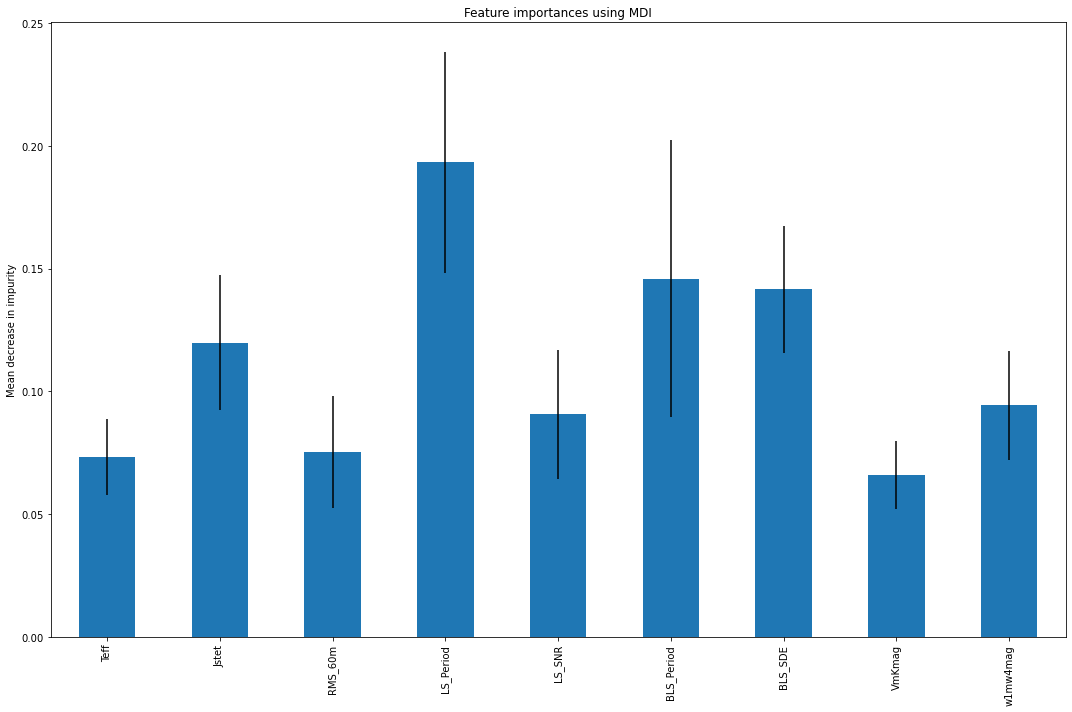

In [40]:
feature_names = [f"{val}" for val in list(X.columns.values)]
forest = RandomForestClassifier(random_state=0,n_estimators=10)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [41]:
ypredfor = forest.predict(X_test)
ypredfor

array(['EC', 'EC', 'RR', 'EC', 'EC', 'ED', 'RR', 'DSCT', 'ED', 'EC', 'RR',
       'EC', 'RR', 'EC', 'EC', 'RR', 'ED', 'EC', 'EC', 'DSCT', 'DSCT',
       'RR', 'RR', 'RR', 'RR', 'RR', 'EC', 'RR', 'DSCT', 'RR', 'RR', 'EC',
       'ED', 'DSCT', 'DSCT', 'DSCT', 'EC', 'DSCT', 'EC', 'EC', 'RR', 'RR',
       'RR', 'DSCT', 'DSCT', 'EC', 'DSCT', 'ED', 'RR', 'DSCT', 'ED', 'ED',
       'RR', 'DSCT', 'RR', 'ED', 'RR', 'RR', 'ED', 'EC', 'DSCT', 'RR',
       'EC', 'ED', 'ED', 'RR', 'EC', 'DSCT', 'ED', 'EC', 'EC', 'RR', 'ED',
       'ED', 'ED', 'RR', 'DSCT', 'ED', 'RR', 'ED', 'DSCT', 'RR', 'ED',
       'EC', 'DSCT', 'ED', 'EC', 'EC', 'ED', 'EC', 'EC', 'DSCT', 'ED',
       'ED', 'EC', 'DSCT', 'RR', 'ED', 'DSCT', 'RR', 'DSCT', 'ED', 'EC',
       'ED', 'EC', 'DSCT', 'ED', 'EC', 'EC', 'DSCT', 'RR', 'EC', 'DSCT',
       'DSCT', 'ED', 'EC', 'RR', 'ED', 'DSCT', 'DSCT', 'ED', 'EC', 'DSCT',
       'DSCT', 'EC', 'EC', 'RR', 'ED', 'RR', 'RR', 'RR', 'EC', 'ED', 'EC',
       'DSCT', 'EC', 'RR', 'ED', 'ED', 'RR', 

In [42]:
metrics.accuracy_score(y_test, ypredfor)

0.5464684014869888

In [514]:
ECsam2 = EC.sample(n=4017)
RRsam2 = RR.sample(n=4017)

RREC = pd.concat([ECsam2,RRsam2])
RREC

_1  Type    Teff     Jstet  \
7162   313.082836 -25.081979                        1  5407.0   0.30807   
14991  332.222117 -72.52755                         1  5341.0  -0.24273   
4735   333.636909 -23.646584                        1  5656.0  -0.12678   
18989  359.01917 -83.531892                         1  5104.0   0.96421   
12352  317.427413 -49.859502                        1  5782.0   0.26472   
...                                         ...   ...     ...       ...   
3725   333.972055 -25.38032                         0  4699.0  21.65765   
16228  332.328333 -71.589229                        0  5141.0   0.03991   
2102   331.86458 -39.43047                          0  4111.0   0.15299   
17862  60.361768 -74.290757                         0  5741.0  -0.28463   
3651   325.759343 -21.349566                        0  5225.0  -0.28381   

       RMS_60m    LS_Period      LS_SNR   BLS_Period   BLS_SDE    VmKmag  \
7162   0.01715   13.8748165   326.71766   0.10409711    8.1591  1.758000   
14991  0.00216  25.30273455    48.34345   12.2211927   7.27731  1.814000   
4735    0.0102  11.59734125    59.55859   13.9168095   9.22806  1.657000   
18989  0.04126   0.17615905  1942.17841    0.1760927  10.30922  2.026000   
12352  0.01604    13.916504   555.82802  13.01386874  11.24302  1.448000   
...        ...          ...         ...          ...       ...       ...   
3725   0.08495   0.54682945  2481.46347   0.54609054   8.30154  2.375000   
16228  0.01431  14.64895158   225.03712   12.2211927  10.88619  2.057000   
2102   0.00237   2.53032891   546.92575  12.22142791   9.67165  3.161000   
17862  0.00248  12.65142273    52.22291  11.51957837   5.97377  1.841000   
3651   0.00067   11.0917972     80.2441  10.86233162   7.03846  2.030001   

       w1mw4mag  
7162      4.944  
14991     2.926  
4735      5.267  
18989     5.468  
12352     4.467  
...         ...  
3725      1.924  
16228     4.999  
2102      0.251  
17862     2.423  
3651      1.155  

[8034 rows x 11 columns]

In [515]:
X = RREC.drop(columns = ['_1','Type'])
X = X.apply(pd.to_numeric)
Y = RREC['Type']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
print(len(X_train), len(X_test), len(y_train), len(y_test))

6025 2009 6025 2009


In [516]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)
ypred

array([0, 0, 1, ..., 0, 0, 1])

In [517]:
metrics.confusion_matrix(y_test, ypred)

array([[757, 216],
       [512, 524]])

In [518]:
metrics.accuracy_score(y_test, ypred)

0.6376306620209059

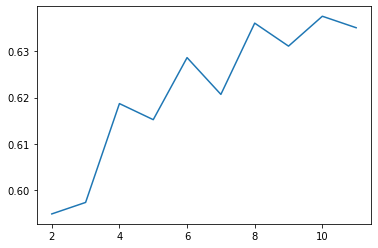

In [519]:
neighbors = [2,3,4,5,6,7,8,9,10,11]
accuracy = []
for val in neighbors:
    knn = KNeighborsClassifier(n_neighbors=val)
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
    
plt.plot(neighbors,accuracy)

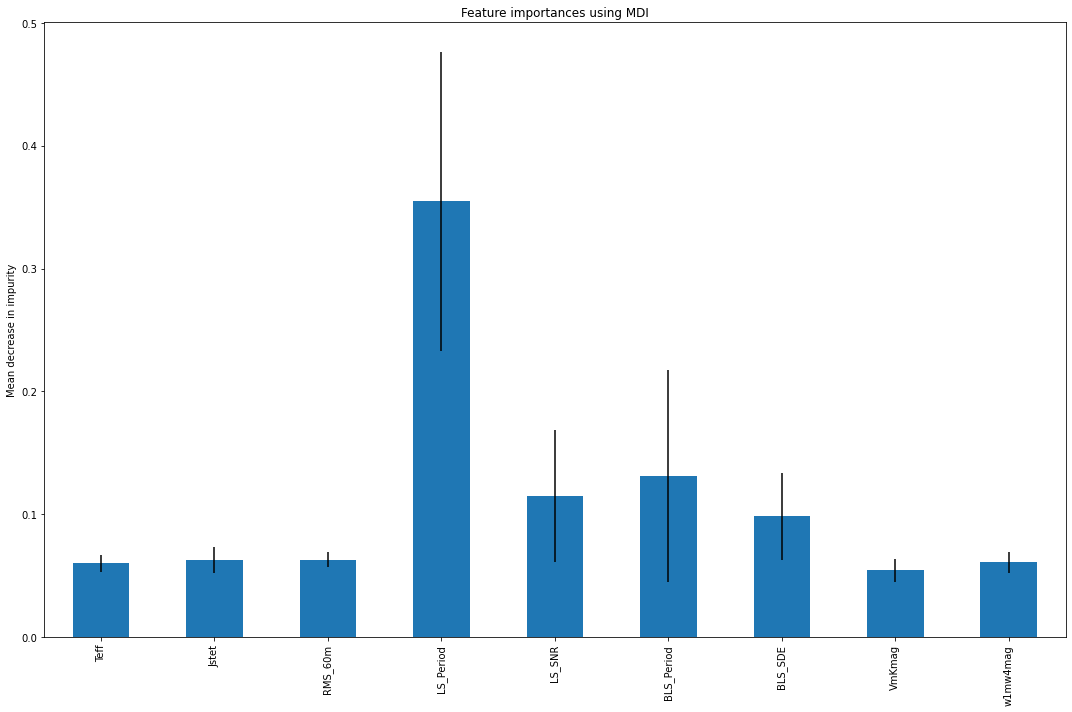

In [520]:
feature_names = [f"{val}" for val in list(X.columns.values)]
forest = RandomForestClassifier(random_state=0,n_estimators=10)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [521]:
ypredfor = forest.predict(X_test)
ypredfor

array([1, 0, 0, ..., 0, 0, 1])

In [522]:
metrics.accuracy_score(y_test, ypredfor)

0.7819810851169736

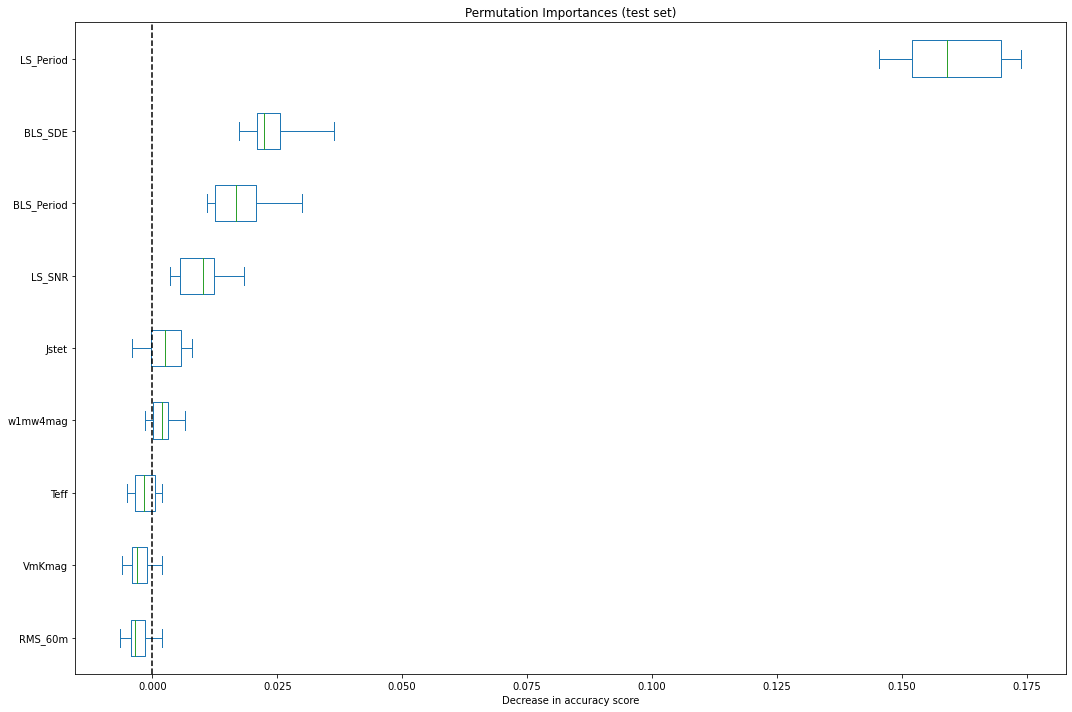

In [523]:
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline


rf = Pipeline([("classifier", RandomForestClassifier(random_state=42))])
rf.fit(X_train, y_train)

result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10,figsize=(15,10))
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

In [524]:
X = pd.concat([RREC['w1mw4mag'],RREC['BLS_SDE']], axis=1)
X = X.apply(pd.to_numeric)
Y = RREC['Type']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, train_size=0.7)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)

metrics.accuracy_score(y_test, ypred)

0.6383243467440896

In [525]:
feature_names = [f"{val}" for val in list(X.columns.values)]
forest = RandomForestClassifier(random_state=50,n_estimators=100)
forest.fit(X_train, y_train)

ypredfor = forest.predict(X_test)

metrics.accuracy_score(y_test, ypredfor)

0.606387391124015

In [526]:
from sklearn.cluster import KMeans

In [532]:
kmeans = KMeans(n_clusters = 2, random_state = 0, n_init=10)
kmeans.fit(X_train)

ypredkmeans = kmeans.predict(X_test)
metrics.accuracy_score(y_test, ypredkmeans)

0.34467026130236417

In [500]:
test4 = pd.concat([RREC['Type'],RREC['LS_Period'],RREC['BLS_Period'],RREC['BLS_SDE'],RREC['LS_SNR'],RREC['Jstet'],RREC['RMS_60m'],RREC['w1mw4mag'],RREC['VmKmag'],RREC['Teff']], axis=1)
test4 = test4.reset_index(drop=True)
test4

Type    LS_Period   BLS_Period  BLS_SDE      LS_SNR     Jstet  RMS_60m  \
0      EC   0.13833502    0.2765898  10.1533   263.22606   0.06183  0.00437   
1      EC    0.1743961   0.34869149   9.3223   6458.2576   1.12422  0.01296   
2      EC  12.64187864  12.21314256  9.36578    35.03709  -0.06556  0.01787   
3      EC    23.194275    13.916565  6.35452    40.14136  -0.23759  0.00507   
4      EC   0.16314775   0.16320176  9.33495  8401.00815   2.54718  0.01946   
...   ...          ...          ...      ...         ...       ...      ...   
8029   RR   0.57583323     1.150291  8.58122    48.81145  -0.22262  0.00773   
8030   RR   2.02405051   0.12497458  8.19034    14.72526  -0.17811   0.0019   
8031   RR   0.46312178   0.46293287  7.23668  2988.42816   6.86889  0.10142   
8032   RR  14.61605684   12.9865371  9.03849   467.54358    0.3947  0.01481   
8033   RR   11.1332028   0.12513466  5.61134     20.8706  -0.25307  0.00789   

      w1mw4mag  VmKmag    Teff  
0     3.944000   1.644  6035.0  
1     3.395000   1.587  5655.0  
2     4.551000   1.780  5780.0  
3     4.139000   1.062  6457.0  
4     3.024000   1.612  5988.0  
...        ...     ...     ...  
8029  4.584000   3.151  4117.0  
8030  1.749000   2.696  4429.0  
8031  4.504001   1.051  6572.0  
8032  5.165000   1.389  5858.0  
8033  5.025999   1.420  5784.0  

[8034 rows x 10 columns]

In [498]:
test2 = RREC['Type']
test2 = test2.reset_index(drop=True)

In [501]:
test5 = test4[['LS_Period','BLS_Period','BLS_SDE','LS_SNR','Jstet','RMS_60m','w1mw4mag','VmKmag','Teff']].apply(pd.to_numeric)
test6 = pd.concat([test2,test5], axis=1)
test6

Type  LS_Period  BLS_Period   BLS_SDE      LS_SNR    Jstet  RMS_60m  \
0      EC   0.138335    0.276590  10.15330   263.22606  0.06183  0.00437   
1      EC   0.174396    0.348691   9.32230  6458.25760  1.12422  0.01296   
2      EC  12.641879   12.213143   9.36578    35.03709 -0.06556  0.01787   
3      EC  23.194275   13.916565   6.35452    40.14136 -0.23759  0.00507   
4      EC   0.163148    0.163202   9.33495  8401.00815  2.54718  0.01946   
...   ...        ...         ...       ...         ...      ...      ...   
8029   RR   0.575833    1.150291   8.58122    48.81145 -0.22262  0.00773   
8030   RR   2.024051    0.124975   8.19034    14.72526 -0.17811  0.00190   
8031   RR   0.463122    0.462933   7.23668  2988.42816  6.86889  0.10142   
8032   RR  14.616057   12.986537   9.03849   467.54358  0.39470  0.01481   
8033   RR  11.133203    0.125135   5.61134    20.87060 -0.25307  0.00789   

      w1mw4mag  VmKmag    Teff  
0     3.944000   1.644  6035.0  
1     3.395000   1.587  5655.0  
2     4.551000   1.780  5780.0  
3     4.139000   1.062  6457.0  
4     3.024000   1.612  5988.0  
...        ...     ...     ...  
8029  4.584000   3.151  4117.0  
8030  1.749000   2.696  4429.0  
8031  4.504001   1.051  6572.0  
8032  5.165000   1.389  5858.0  
8033  5.025999   1.420  5784.0  

[8034 rows x 10 columns]

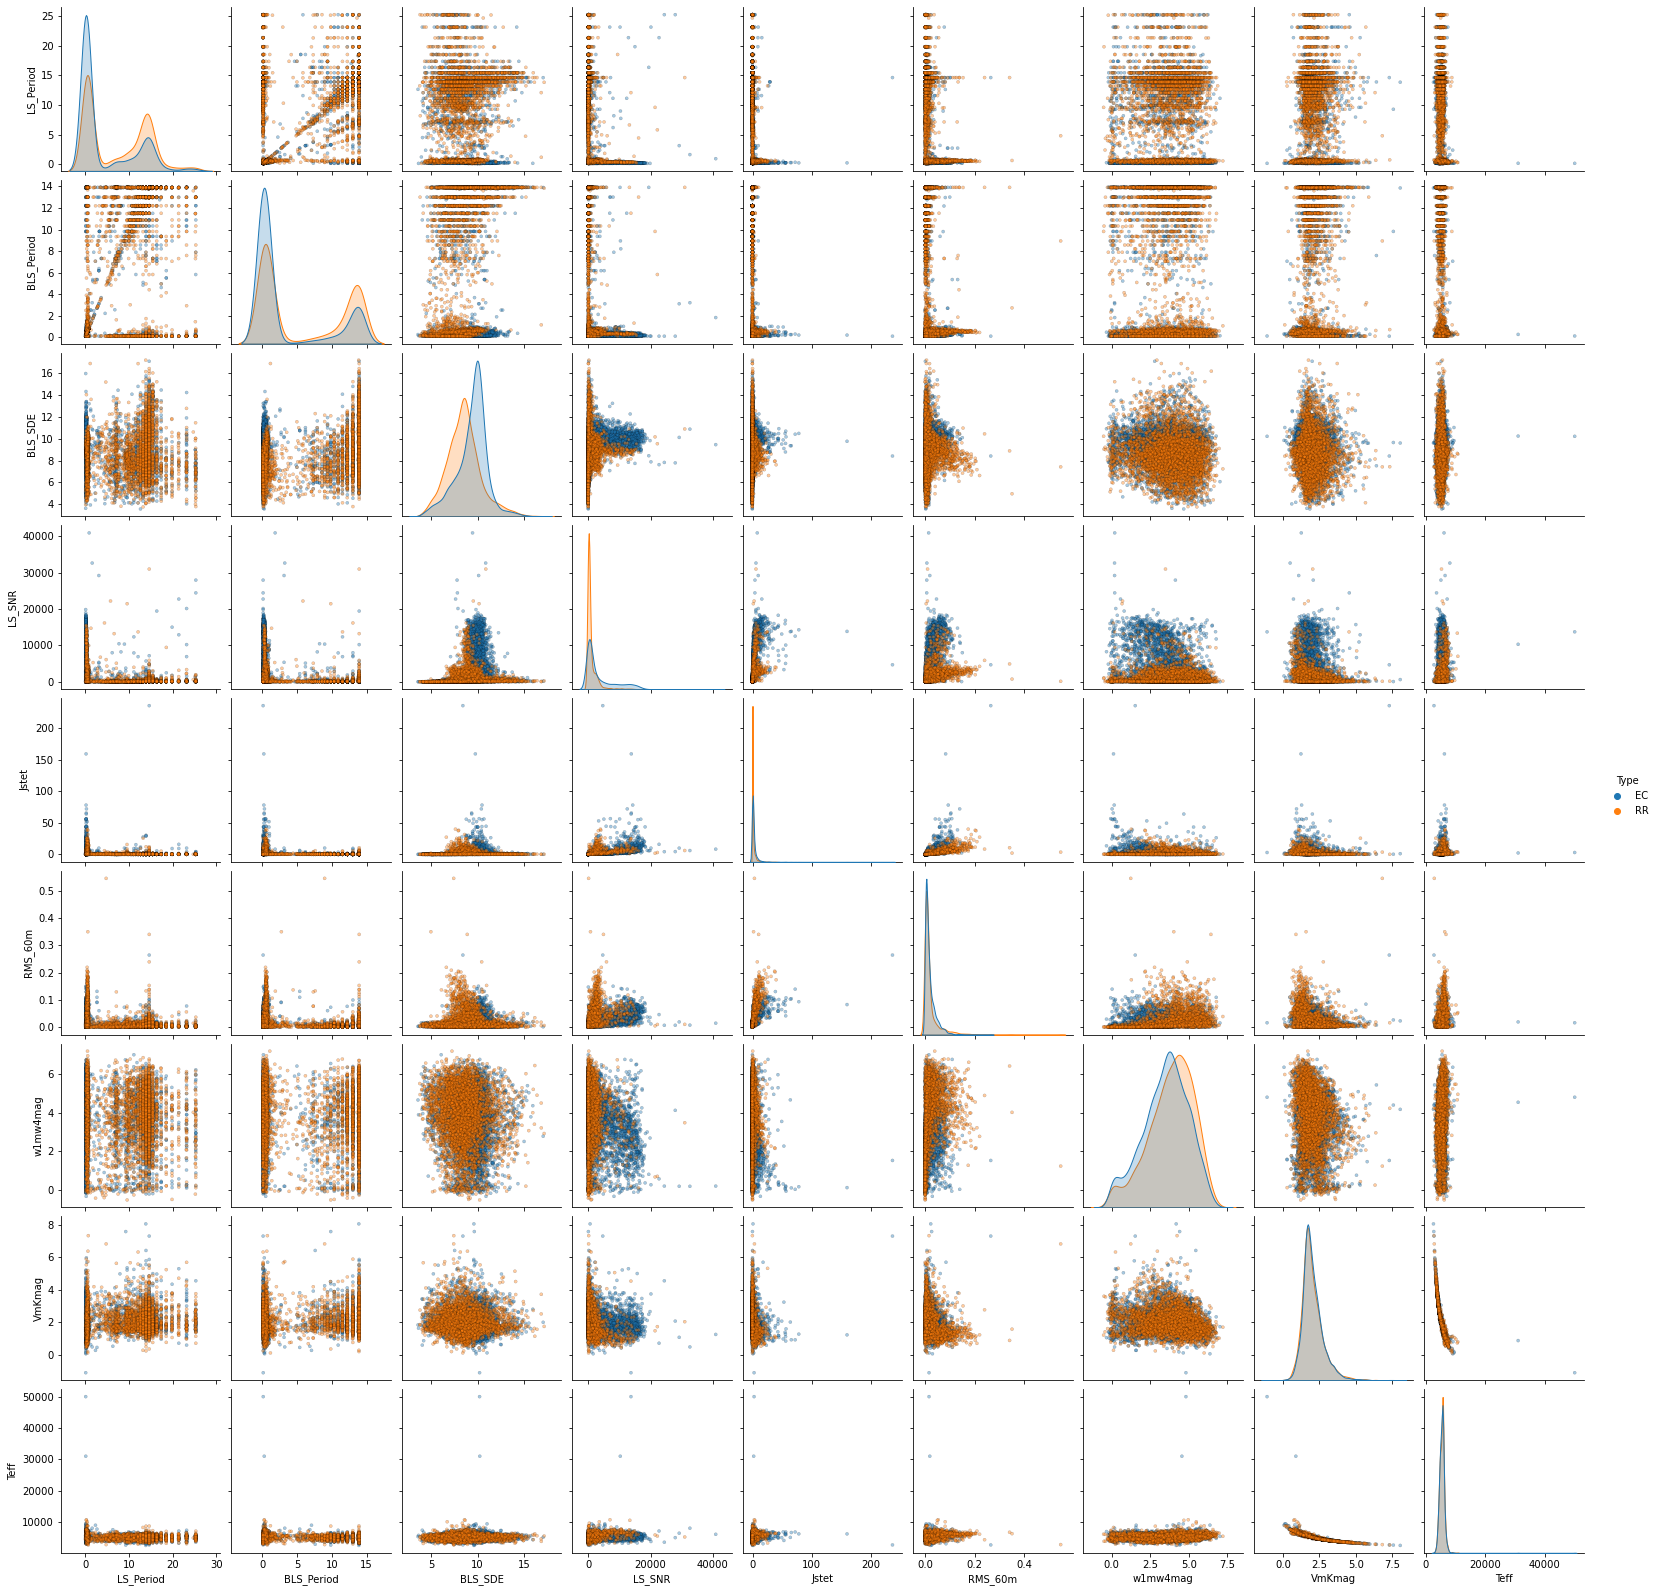

In [510]:
import seaborn as sns

sns.pairplot(test6, hue = 'Type',plot_kws = {'alpha': 0.4, 's': 10, 'edgecolor': 'k'})

LS_SNR and Teff Not good for kneighbors, takes down the accuracy score by a lot

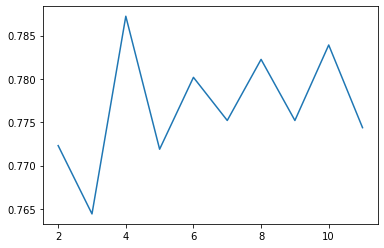

In [379]:
neighbors = [2,3,4,5,6,7,8,9,10,11]
accuracy = []
for val in neighbors:
    knn = KNeighborsClassifier(n_neighbors=val)
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
    
plt.plot(neighbors,accuracy)

In [380]:
metrics.confusion_matrix(y_test, ypred)

array([[1039,  179],
       [ 365,  828]])

In [381]:
feature_names = [f"{val}" for val in list(X.columns.values)]
forest = RandomForestClassifier(random_state=50,n_estimators=100)
forest.fit(X_train, y_train)

ypredfor = forest.predict(X_test)
ypredfor

array([0, 0, 0, ..., 0, 1, 0])

In [382]:
metrics.accuracy_score(y_test, ypredfor)

0.7872252177519702

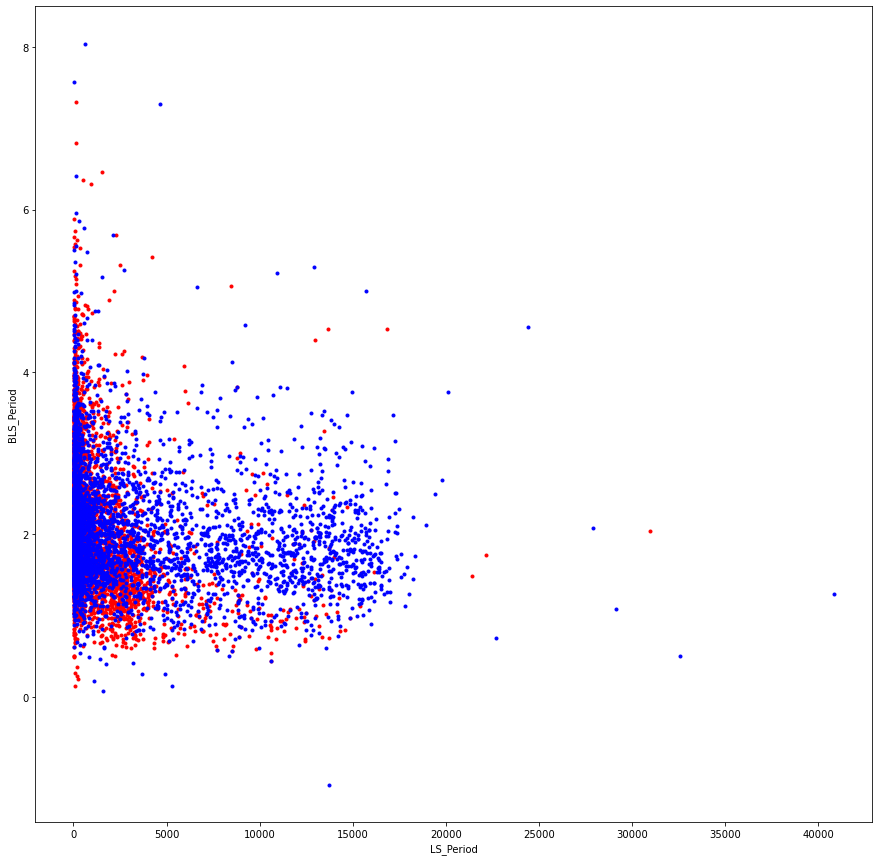

In [503]:
fig = plt.figure(figsize=(15,15))

plt.scatter(pd.to_numeric(RR['LS_SNR']), pd.to_numeric(RR['VmKmag']), marker = '.', color = 'red')
plt.scatter(pd.to_numeric(EC['LS_SNR']), pd.to_numeric(EC['VmKmag']), marker = '.', color = 'blue')

plt.xlabel('LS_Period')
plt.ylabel('BLS_Period')

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,15))

plt.scatter(pd.to_numeric(RR['LS_Period']), pd.to_numeric(RR['BLS_SDE']), marker = '.', color = 'red')
plt.scatter(pd.to_numeric(EC['LS_Period']), pd.to_numeric(EC['BLS_SDE']), marker = '.', color = 'blue')

plt.xlabel('LS_Period')
plt.ylabel('BLS_Period')

plt.show()

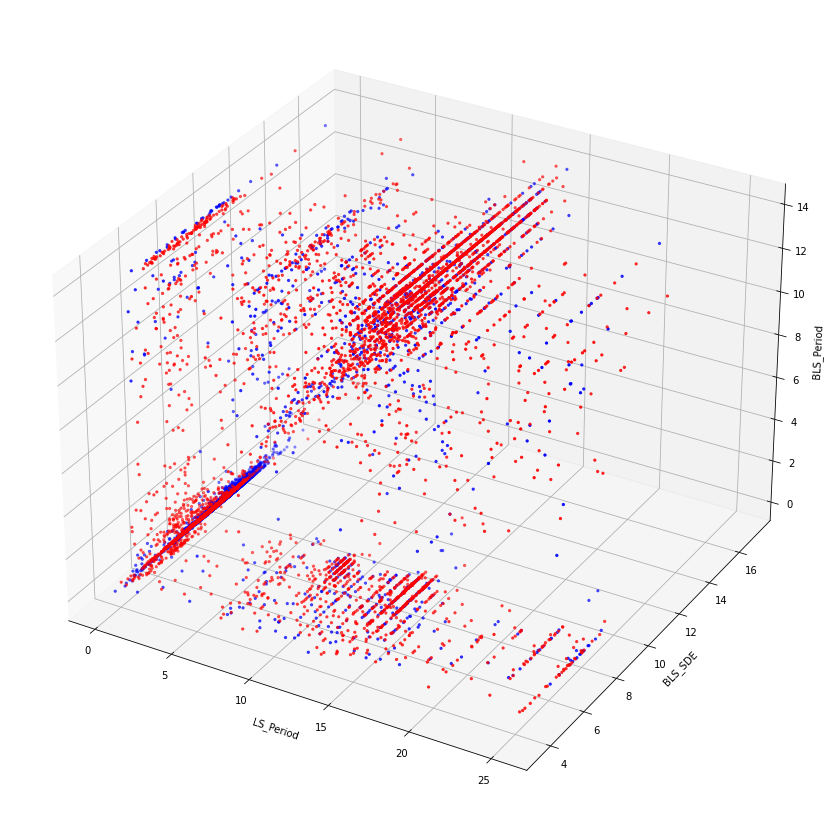

In [73]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(pd.to_numeric(RR['LS_Period']), pd.to_numeric(RR['BLS_SDE']), pd.to_numeric(RR['BLS_Period']), marker = '.', color = 'red')
ax.scatter(pd.to_numeric(EC['LS_Period']), pd.to_numeric(EC['BLS_SDE']), pd.to_numeric(EC['BLS_Period']), marker = '.', color = 'blue')

ax.set_xlabel('LS_Period')
ax.set_ylabel('BLS_SDE')
ax.set_zlabel('BLS_Period')

plt.show()

In [36]:
import plotly.express as px

RRECnew = RREC[['LS_Period','BLS_SignaltoPinknoise','BLS_SN']].apply(pd.to_numeric)

test = pd.concat([RRECnew,RREC['Type']], axis=1)

fig = px.scatter_3d(test, x='LS_Period', y='BLS_SignaltoPinknoise', z='BLS_SN', color='Type')

fig.update_traces(marker_size = 2)

fig.show()